## Plotting simulations using PCA
Here I'll demonstrate the `plot_simulations_pca()` function which will
collapse all simulation summary statistics and plot them using the first
two PCs.

In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display, Image
from collections import OrderedDict

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS

## Path to the simulations. You'll obviously have to change this
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


By default the function will plot 1000 simulations. You can tune the # of simulations
to plot with the `nsims` parameter.

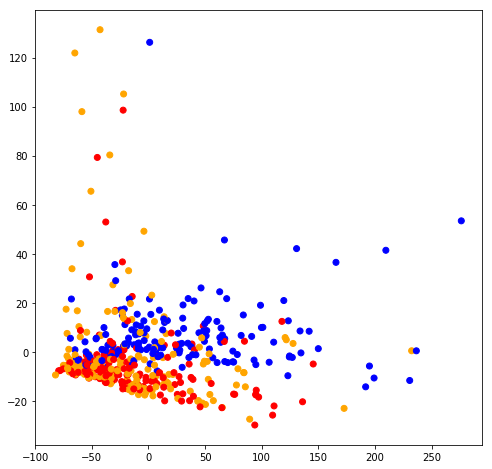

In [4]:
ax = MESS.plotting.plot_simulations_pca(simfile, nsims=500)

Here are a couple more nice features. You can choose to plot the figure using only
subset of the summary statistics (features) given the availability of specific
datasets (e.g. below we plot the PCs using only sumstats for pi and traits).
The other feature introduced here is using the `select` argument to prune only
simulations close to this value of lambda.

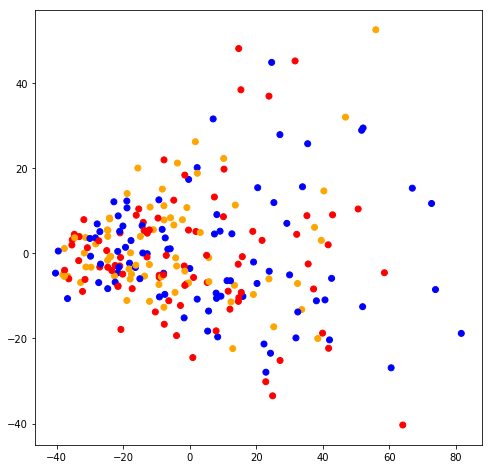

In [9]:
ax = MESS.plotting.plot_simulations_pca(simfile, nsims=1000,\
                                             feature_set=MESS.stats.feature_sets()["pi+trait"],\
                                             select=0.1)

You can tune the tolerance of the select argument with the `tol`
parameter so that the figure will contain all sumstats with lambda equal
to `select` +/- `tol`. And, finally, you can write the figure out
to a file with the `outfile` parameter.

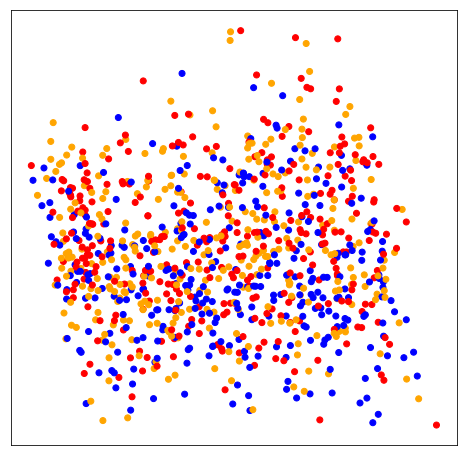

In [108]:
ax = MESS.plotting.plot_simulations_pca(simfile, nsims=1000,\
                                        feature_set=MESS.stats.feature_sets()["abundance"],\
                                        select=0.1,
                                        tol=0.05)

## PCA animations through time
You can even generate an animated gif of the PCA plot at varying timeslices. This will create an animated gif in your notebook directory, you'll need to open it through the notebook browser interface.

In [115]:
MESS.plotting.plots_through_time(simfile=simfile,\
                                 plot_fun=MESS.plotting.plot_simulations_pca,\
                                 ntimes=20,\
                                 outgif="PCA-animation.gif",\
                                 verbose=True)

  [####################] 100% Creating animation s 

## Testing

/home/iovercast/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


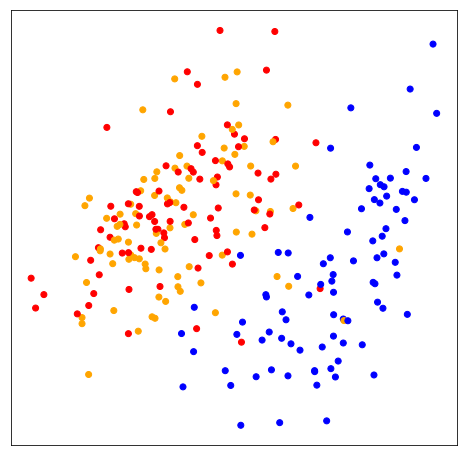

In [98]:
ax = MESS.plotting.plot_simulations_pca(simfile, nsims=1000,\
                                            select=.80)

In [80]:
from sklearn.preprocessing import StandardScaler
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
sim_df = pd.read_csv(simfile, sep="\t", header=0)
sim_df = sim_df.iloc[:, 22:]
sim_df[:10]
scaler = StandardScaler()
scaler.fit_transform(sim_df[:10])

array([[ 1.84388999,  2.2049875 ,  2.01363723,  1.89460952,  0.21212271,
         0.11326967, -0.01910468, -0.12940451,  0.36846033,  0.6893516 ,
         1.80945463,  2.07204341, -1.        ,  0.53587071,  1.73384501,
         2.42492775, -0.03027517, -0.99656679,  1.13031697,  2.78909932,
         0.        ,  1.01212464,  1.14924603,  1.02362347,  0.9423768 ,
        -0.83334016, -0.01566662,  1.49065776,  0.61631394, -0.77877172,
        -0.54398703, -0.94483711,  0.26165798,  1.6629926 ,  1.36130641,
        -1.05886751, -0.63961752, -0.45588706,  0.28679201,  0.43158233,
         0.36550228, -0.21420276,  0.27803047, -0.56513788, -0.39824697,
        -0.2380259 , -1.63395596,  0.00420993, -0.68944078,  0.55557438,
         0.49929416, -0.07405714,  0.25724788, -0.18569534, -1.09321633,
        -0.86164044, -0.81649658, -0.60302269, -0.81649658],
       [ 0.94555538, -0.25440358, -0.41674442, -0.45611395,  2.03466597,
         2.15545172,  2.28141901,  2.36730924,  1.23081429,  1.

In [90]:
out = subprocess.check_output("convert")
subprocess.CalledProcessError

CalledProcessError: Command 'convert' returned non-zero exit status 1